In [105]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [108]:
##Splitting independant and dependant features
X = dataset.iloc[:,3:-1]  ##first 3 columns are not important
Y = dataset['Exited']

In [109]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [110]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [111]:
##FEATURE ENGINEERING
geography = pd.get_dummies(X["Geography"],drop_first=True) #if both columns 0 then its france
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [112]:
gender = pd.get_dummies(X['Gender'],drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [113]:
## removing the 2 columns then concatenate above two variables in the dataframe
X = X.drop(["Geography","Gender"],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [114]:
X = pd.concat([X,geography,gender],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [115]:
#splitting into train and test set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [116]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [118]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [119]:
X_train.shape

(8000, 11)

In [120]:
X_test.shape

(2000, 11)

In [145]:
##lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [146]:
##Initialize the ANN
classifier = Sequential()

In [147]:
## Adding the input layer, here we have 11 input columns
classifier.add(Dense(units = 11,activation = 'relu'))

In [148]:
## Adding first hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))
classifier.add(Dropout(0.2))

In [149]:
## Adding second hidden layer
classifier.add(Dense(units = 6,activation = 'relu' ))
classifier.add(Dropout(0.3))

In [150]:
## Adding output layer
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [151]:
## here adam takes default learning rate as 0.01.Adam will always good to use
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [152]:
## Manual process of specifying the learning rate and use this opt variable in optimizer parameter above
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [154]:
## Early stopping - when the accuracy not increasing at some point it will stop the epoch
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [155]:
model_history = classifier.fit(X_train,Y_train,validation_split= 0.33,batch_size = 10,epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5589 - accuracy: 0.7434 - val_loss: 0.4673 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4897 - accuracy: 0.7951 - val_loss: 0.4477 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4637 - accuracy: 0.7990 - val_loss: 0.4317 - val_accuracy: 0.7997
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4421 - accuracy: 0.8117 - val_loss: 0.4136 - val_accuracy: 0.8224
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4187 - accuracy: 0.8283 - val_loss: 0.3956 - val_accuracy: 0.8304
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4069 - accuracy: 0.8375 - val_loss: 0.3819 - val_accuracy: 0.8417
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4081 - accuracy: 0.8311 - val_loss: 0.3786 - val_accuracy:

In [156]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

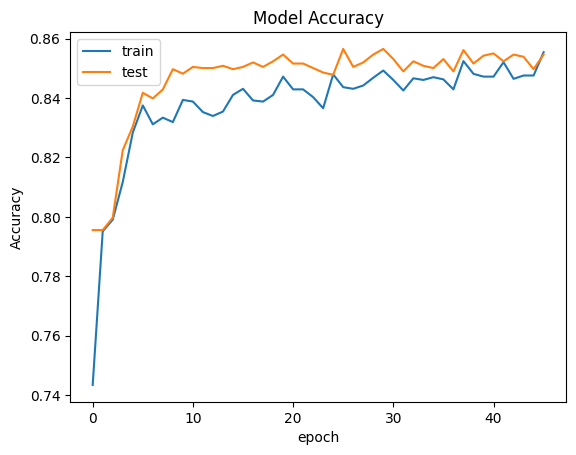

In [157]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

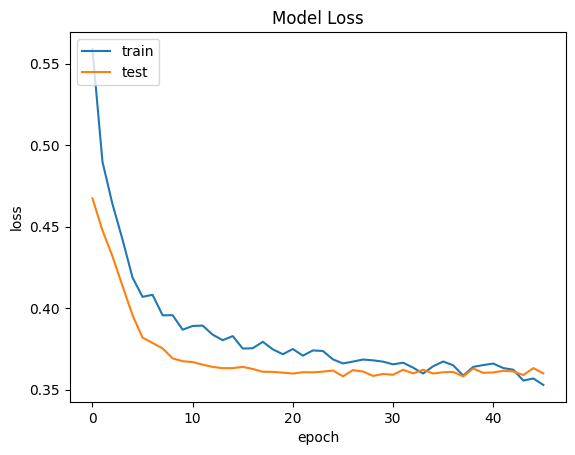

In [158]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [159]:
## Making the prediction and evaluating the model

# predicting the test set results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [160]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1523,   72],
       [ 213,  192]])

In [161]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred,Y_test)
score

0.86

In [162]:
## get the weights
classifier.get_weights()

[array([[-0.04529604,  0.2950292 , -0.04063278, -0.19476674, -0.12146728,
          0.02401092,  0.48222125, -0.14496982, -0.10913028, -0.28814265,
          0.0050677 ],
        [ 0.90556586, -0.00646426, -0.7963545 ,  0.42863795, -0.41524902,
          0.4121906 , -0.35595807, -0.6263443 ,  0.07991375, -0.02564227,
          0.21095364],
        [ 0.10863741,  0.34181902,  0.11566842, -0.14784332,  0.41053358,
          0.25726238, -0.03440189, -0.11726158,  0.26966786,  0.2652866 ,
         -0.03267476],
        [ 0.00259785, -0.6074881 , -0.08200499, -0.5724126 , -0.3655646 ,
          0.27106905, -0.07034457, -0.1838828 ,  0.14987925, -0.4558434 ,
          0.23030291],
        [ 1.0132014 ,  0.12108309, -0.13190106, -1.2050935 ,  0.45289972,
         -0.94807446,  0.199717  ,  0.10942004,  0.3190819 , -0.00576602,
          1.1539742 ],
        [-0.01734756, -0.14778905, -0.15999581, -0.07452262,  0.02812078,
          0.02909283,  0.17754813,  0.10844721, -0.1226065 , -0.3492620